# Run Piscis

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from piscis import Piscis
from piscis.data import load_datasets
from piscis.downloads import download_dataset
from piscis.utils import pad_and_stack

In [2]:
# Download the Piscis dataset.
download_dataset('20230905', '')

(…)ld_Seq0000_crop1to1407_14Jan2019_CY5.npz:   0%|          | 0.00/2.15M [00:00<?, ?B/s]

(…)API,CY3,A594,Brightfield_Seq0001_CY3.npz:   0%|          | 0.00/4.32M [00:00<?, ?B/s]

(…)ts/wniu/Piscis/20230905/A3_GFP1_A594.npz:   0%|          | 0.00/9.13M [00:00<?, ?B/s]

(…)ets/wniu/Piscis/20230905/A3_GFP1_CY3.npz:   0%|          | 0.00/3.55M [00:00<?, ?B/s]

(…)ets/wniu/Piscis/20230905/A3_GFP1_CY5.npz:   0%|          | 0.00/5.26M [00:00<?, ?B/s]

(…)PI,A594,YFP,Brightfield_Seq0000_A594.npz:   0%|          | 0.00/4.23M [00:00<?, ?B/s]

(…)PI_DMin,CY3,A594,CY5,CY7_Seq0000_CY5.npz:   0%|          | 0.00/2.75M [00:00<?, ?B/s]

(…)u/Piscis/20230905/microtubule_subset.npz:   0%|          | 0.00/4.04M [00:00<?, ?B/s]

(…)wniu/Piscis/20230905/particle_subset.npz:   0%|          | 0.00/15.8M [00:00<?, ?B/s]

(…)wniu/Piscis/20230905/receptor_subset.npz:   0%|          | 0.00/4.04M [00:00<?, ?B/s]

(…)iu/Piscis/20230905/untreated014_A594.npz:   0%|          | 0.00/3.44M [00:00<?, ?B/s]

(…)niu/Piscis/20230905/untreated014_CY5.npz:   0%|          | 0.00/11.7M [00:00<?, ?B/s]

(…)/wniu/Piscis/20230905/vesicle_subset.npz:   0%|          | 0.00/4.06M [00:00<?, ?B/s]

In [3]:
# Load the Piscis test dataset.
test_ds = load_datasets('20230905', load_train=False, load_valid=False, load_test=True)['test']
images = pad_and_stack(test_ds['images'])
test_ds['images'] = images
coords = test_ds['coords']

In [4]:
# Load the Piscis model.
model = Piscis(model_name='20230905')

In [5]:
# Run the Piscis model.
coords_pred, y = model.predict(images, threshold=1.0, intermediates=True)

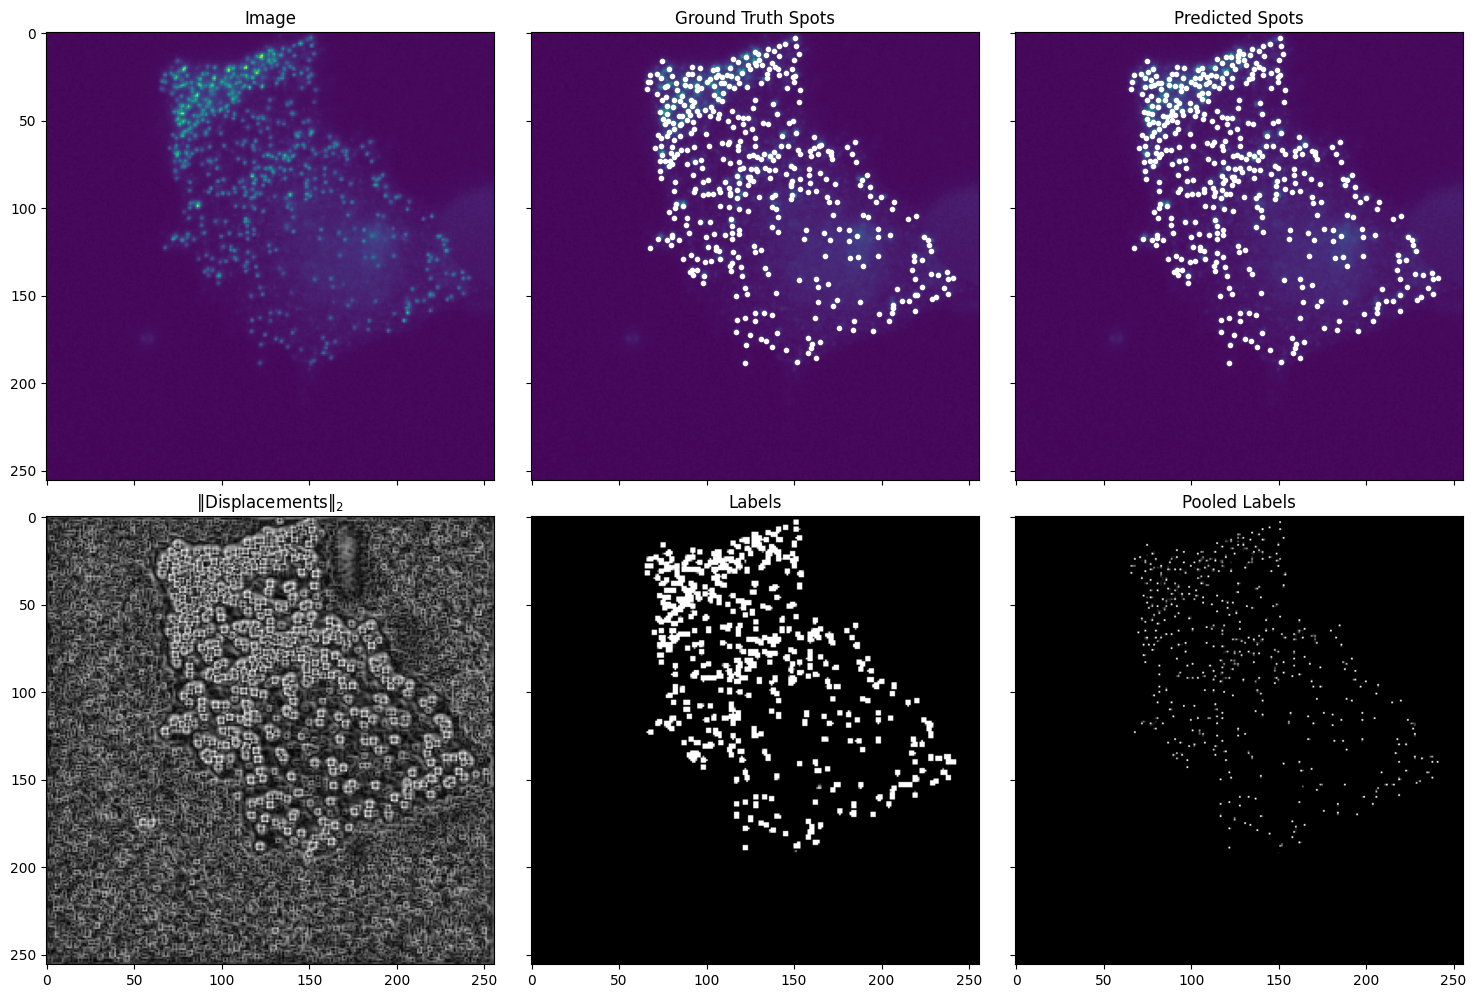

In [6]:
# Plot results.
i = 30

fig, axs = plt.subplots(2, 3, figsize=(15, 10), sharex=True, sharey=True)

axs[0, 0].imshow(images[i])
axs[0, 0].set_title('Image')

axs[0, 1].imshow(images[i])
axs[0, 1].plot(coords[i][:, 1], coords[i][:, 0], '.', c='white')
axs[0, 1].set_title('Ground Truth Spots')

axs[0, 2].imshow(images[i])
axs[0, 2].plot(coords_pred[i][:, 1], coords_pred[i][:, 0], '.', c='white')
axs[0, 2].set_title('Predicted Spots')

axs[1, 0].imshow(np.linalg.norm(y[i, :2], axis=0), cmap='gray')
axs[1, 0].set_title(r'$\|\mathrm{Displacements}\|_2$')

axs[1, 1].imshow(y[i, 2], cmap='gray')
axs[1, 1].set_title('Labels')

axs[1, 2].imshow(y[i, 3], cmap='gray')
axs[1, 2].set_title('Pooled Labels')

plt.tight_layout()